In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def S21(a, K1, K2, alpha, R, n, wavelength):
    sigma = a ** 2 * np.exp(-alpha * 2 * np.pi * R)
    beta = n * 2 * np.pi / wavelength
    G = sigma * np.sqrt((1 - K1) * (1 - K2))
    return a * (np.sqrt(1 - K1) - sigma * np.sqrt(1 - K2) * np.exp(-1J * 2 * np.pi * beta * R)) / (1 - G * np.exp(-1J * 2 * np.pi * beta * R))

def S31(a, K1, K2, alpha, R, n, wavelength):
    sigma = a ** 2 * np.exp(-alpha * 2 * np.pi * R)
    beta = n * 2 * np.pi / wavelength
    G = sigma * np.sqrt((1 - K1) * (1 - K2))
    return - a ** 2 * np.sqrt(K1 * K2 * np.exp(-alpha * 2 * np.pi * R) * np.exp(-1J * 2 * np.pi * beta * R)) / (1 - G * np.exp(-1J * 2 * np.pi * beta * R))

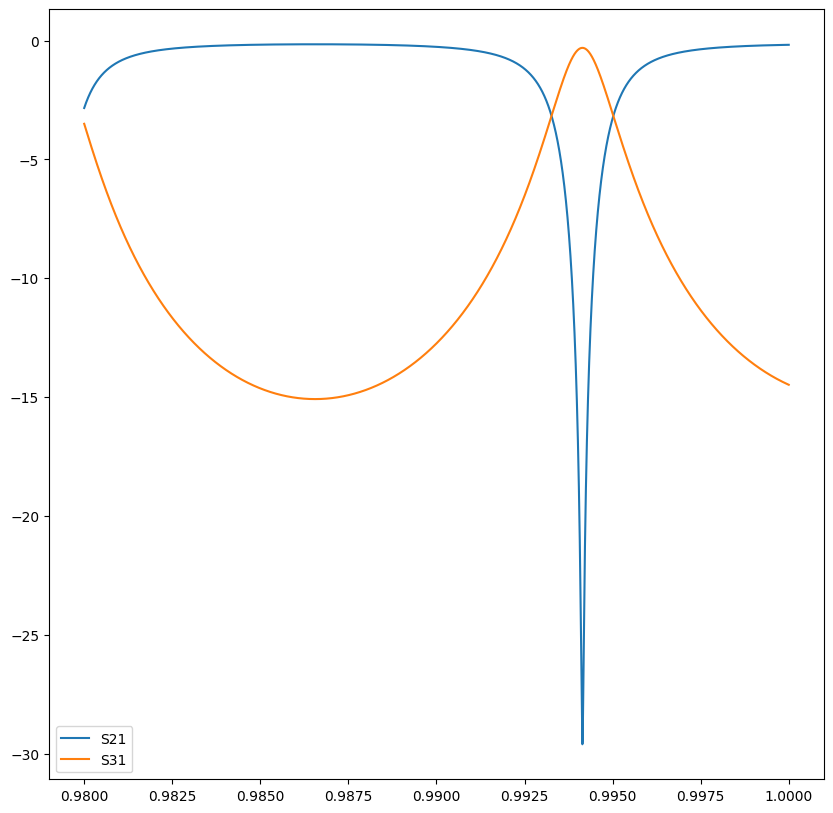

In [89]:
plt.figure(figsize = (10,10))

wavelength = np.linspace(0.98, 1, 100000) * 10 ** (-4)

lambda1 = 1.55
lambda2 = 1.31
lambda3 = 0.98

n1 = 1.4440
n2 = 1.4468
n3 = 1.4507

a = 0.999
K1 = 0.3
K2 = 0.3
alpha = np.log(10)
#R = 13 * 10 ** (-4)
R = 5 * n3 * lambda3 * 10**(-4)

plt.plot(wavelength * 10 ** 4, 10 * np.log10(np.abs(S21(a, K1, K2, alpha, R, 1.4468, wavelength))**2), label="S21")
plt.plot(wavelength * 10 ** 4, 10 * np.log10(np.abs(S31(a, K1, K2, alpha, R, 1.4468, wavelength))**2), label="S31")

plt.legend()
plt.show()

Optimal R = 7.4185 micrometers


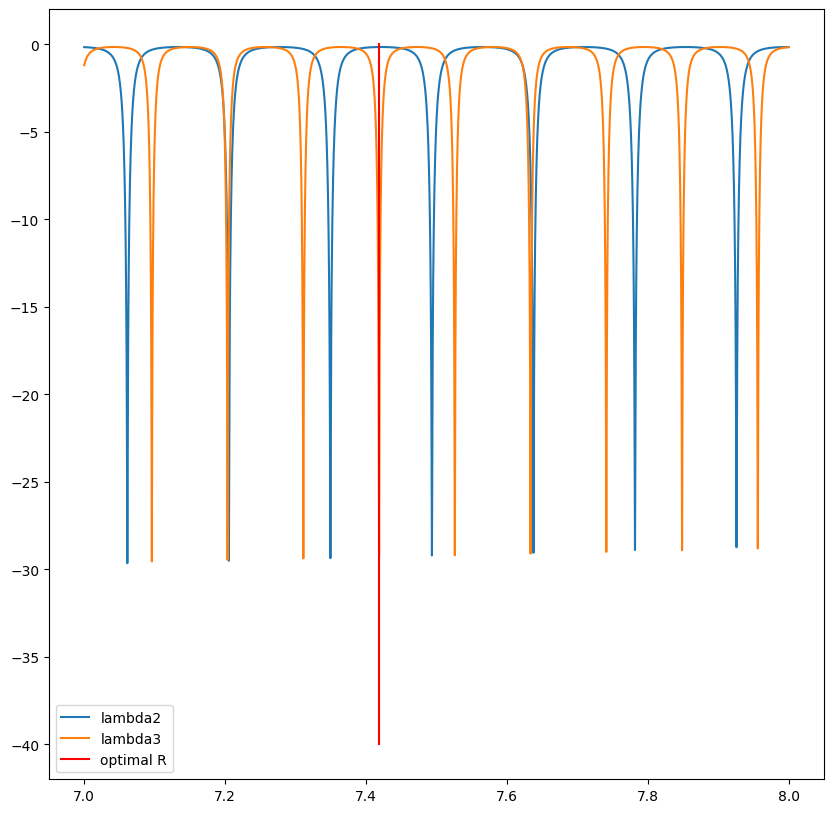

In [90]:
plt.figure(figsize=(10,10))

R_range = np.linspace(7 * 10**(-4), 8 * 10**(-4), 10000)
plt.plot(R_range * 10**4, 10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_range, n2, lambda2 * 10**(-4)))**2), label="lambda2")
plt.plot(R_range * 10**4, 10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_range, n3, lambda3 * 10**(-4)))**2), label="lambda3")


R_check = np.linspace(7.4 * 10**(-4), 7.5 * 10**(-4), 10000)
R_optimal = min(R_check, key=lambda R: np.abs(S21(a, K1, K2, alpha, R, n3, lambda3 * 10**(-4))))
print(f"Optimal R = {R_optimal * 10**4:.4f} micrometers")

plt.plot([R_optimal * 10**4, R_optimal * 10**4], [0, -40], color="red", label="optimal R")

plt.legend()
plt.show()

In [91]:
# for 1.31 and 0.98 micrometers
print(f"S21 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S21 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal, n3, lambda3 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal, n3, lambda3 * 10**(-4)))**2):.2f}dB")

S21 for 1.31 micrometers: -0.16dB
S21 for 0.98 micrometers: -29.31dB
S31 for 1.31 micrometers: -15.07dB
S31 for 0.98 micrometers: -0.32dB


In [93]:
# for 1.31 and 0.98 micrometers
error = 1*10**(-6)
print(f"With error of {error * 10**4} micrometers")
print(f"S21 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal + error, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S21 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S21(a, K1, K2, alpha, R_optimal + error, n3, lambda3 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda2:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal + error, n2, lambda2 * 10**(-4)))**2):.2f}dB")
print(f"S31 for {lambda3:.2f} micrometers: {10 * np.log10(np.abs(S31(a, K1, K2, alpha, R_optimal + error, n3, lambda3 * 10**(-4)))**2):.2f}dB")

With error of 0.01 micrometers
S21 for 1.31 micrometers: -0.16dB
S21 for 0.98 micrometers: -1.52dB
S31 for 1.31 micrometers: -14.99dB
S31 for 0.98 micrometers: -5.64dB


In [80]:
print(f"Optimal R = 7.4185 micrometers, circumfrence = {2 * np.pi * 7.4185:.4f} micrometers.")

Optimal R = 7.4185 micrometers, circumfrence = 46.6118 micrometers.
